<a href="https://colab.research.google.com/github/BintangPray/MPDW_Peramalann/blob/main/Pemodelan_GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Impor Data

In [5]:
data = pd.read_excel("DataMPDW.xlsx")
data['Diff'] = data['Diff']/100
data['DiffA'] = data['Diff']*100
print(data.head())
print(data.shape)

     Tanggal  Harga    Boxcox          Diff         DiffA
0 2022-09-01  62070  0.000077           NaN           NaN
1 2022-09-02  57760  0.000082  4.889887e-08  4.889887e-06
2 2022-09-03  59920  0.000079 -2.532333e-08 -2.532333e-06
3 2022-09-04  59450  0.000080  5.364534e-09  5.364534e-07
4 2022-09-05  61310  0.000078 -2.078201e-08 -2.078201e-06
(700, 5)


In [6]:
print(data.tail())

       Tanggal  Harga    Boxcox          Diff     DiffA
695 2024-07-27  75460  0.000065  4.600660e-08  0.000005
696 2024-07-28  69540  0.000070  4.714021e-08  0.000005
697 2024-07-29  79400  0.000062 -7.487797e-08 -0.000007
698 2024-07-30  84850  0.000059 -3.440562e-08 -0.000003
699 2024-07-31  78630  0.000063  3.962321e-08  0.000004


# Splitting Data

_Splitting_ data dilakukan dengan membagi data menjadi data latih sebanyak 578 amatan dan data uji sebanyak 122 amatan.

Jumlah data latih: 578
Jumlah data uji: 122


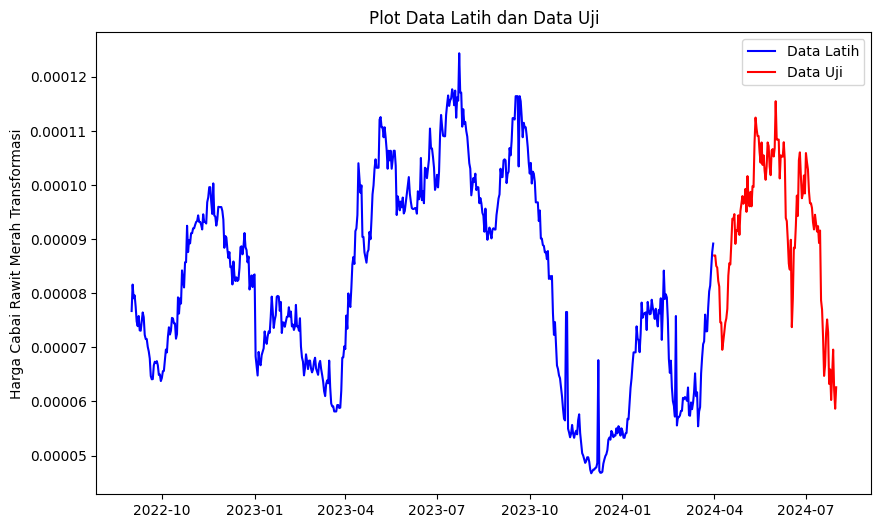

In [7]:
test_size = 122
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

# Menampilkan jumlah data dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Boxcox'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Boxcox'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Harga Cabai Rawit Merah Transformasi')
plt.legend()
plt.show()

Jumlah data latih: 578
Jumlah data uji: 122


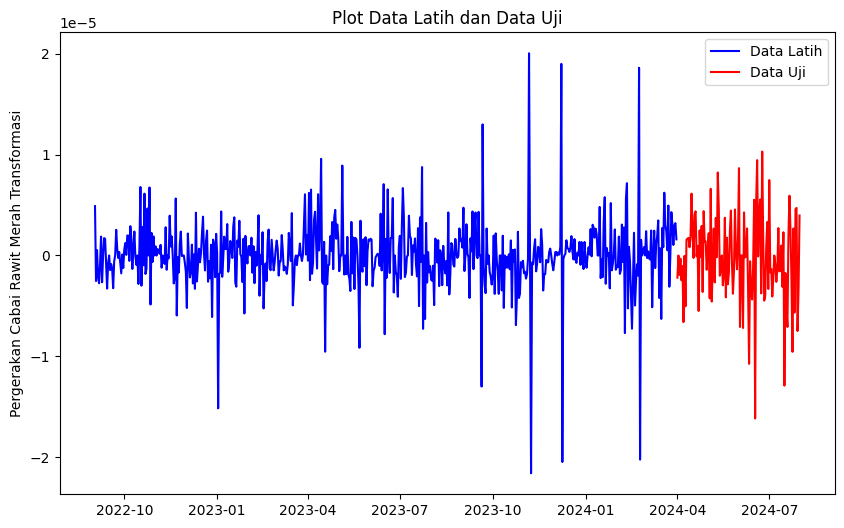

In [8]:
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['DiffA'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['DiffA'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Pergerakan Cabai Rawit Merah Transformasi')
plt.legend()
plt.show()

In [9]:
data_diff = data['Diff'][1:]
train_data_diff = data_diff.iloc[:-test_size]
test_data_diff = data_diff.iloc[-test_size:]

print(train_data_diff.head())
print(train_data_diff.shape)

print(test_data_diff.head())
print(test_data_diff.shape)

1    4.889887e-08
2   -2.532333e-08
3    5.364534e-09
4   -2.078201e-08
5   -2.746259e-08
Name: Diff, dtype: float64
(577,)
578   -2.203949e-08
579    0.000000e+00
580   -1.930456e-08
581   -3.171619e-09
582   -2.460455e-08
Name: Diff, dtype: float64
(122,)


# Pemodelan GARCH

### Pendugaan Parameter

In [45]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(1, 2) model
model_garch12_diff = arch_model(train_data_diff, vol='GARCH', mean = 'constant', p=1, q=2)

# Fit the model
result_garch12_diff = model_garch12_diff.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -9134.547633659959
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -9134.547633991078
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.167e-15. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+07 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [46]:
# Display model fitting summary
print(result_garch12_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                9134.55
Distribution:                  Normal   AIC:                          -18259.1
Method:            Maximum Likelihood   BIC:                          -18237.3
                                        No. Observations:                  577
Date:                Sat, Oct 26 2024   Df Residuals:                      576
Time:                        08:06:19   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.1621e-10  8.178e-10      0.264      0.791 

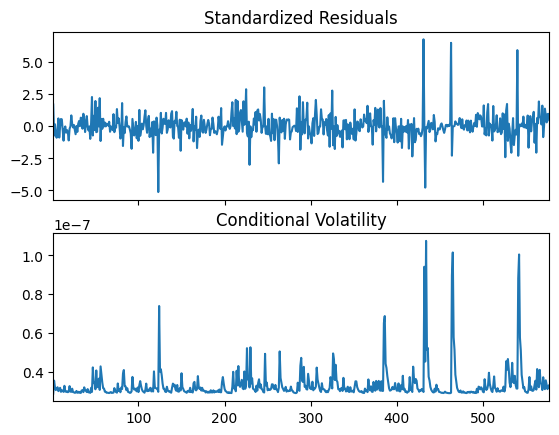

In [47]:
fig = result_garch12_diff.plot()

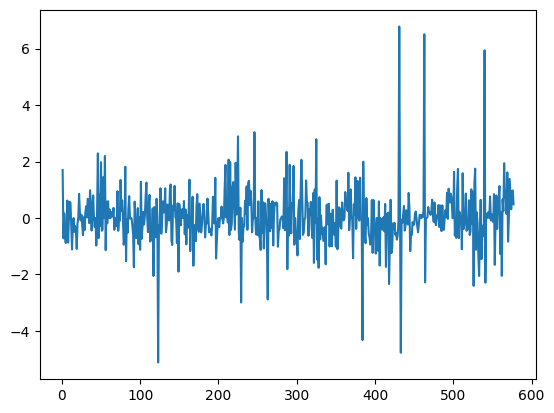

In [48]:
garch_stresidual = result_garch12_diff.resid / result_garch12_diff.conditional_volatility
plt.plot(garch_stresidual)

### Diagnostik Sisaan: Uji Kebebasan Sisaan (Ljung-Box)

$H_0$: Sisaan saling bebas

$H_1$: Sisaan tidak saling bebas

In [49]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox(abs(garch_stresidual), lags=[10], return_df=True)
print(result_df)

     lb_stat  lb_pvalue
10  4.402796   0.927352


### Diagnostik Sisaan: Uji Normalitas Sisaan (Kolmogorov-Smirnov)

$H_0$: Sisaan menyebar normal

$H_1$: Sisaan tidak menyebar normal

In [50]:
from scipy import stats
result_norm = stats.kstest(garch_stresidual, 'norm')
print(result_norm.pvalue)

1.5138582197135223e-05


### Diagnostik Sisaan: Uji Nilai Harapan Sisaan (t-test)

$H_0$: Nilai harapan sisaan nol

$H_1$: Nilai harapan sisaan tidak nol

In [51]:
result_harapan = stats.ttest_1samp(garch_stresidual, 0)
print(result_harapan.pvalue)

0.5849474719299015


In [52]:
from google.colab import files

garch_stresidual.to_excel("garch_stresidual.xlsx", index=False)
files.download("garch_stresidual.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediksi

Pendugaan nilai amatan menggunakan model GARCH(1,1) dilakukan pada data latih dan uji untuk menghitung nilai keakuratan model.

In [53]:
np.random.seed(42)
epsilon_train = np.random.normal(0, 1, 577)

### Prediksi pada Data Latih

In [54]:
predicted_train = result_garch12_diff.conditional_volatility * epsilon_train + 2.1621e-10
predicted_train

,cond_vol
1,1.444749e-08
2,-4.675801e-09
3,2.095119e-08
4,4.667071e-08
5,-7.057595e-09
...,...
573,1.182825e-08
574,-7.063407e-09
575,2.590613e-08
576,-7.201989e-08


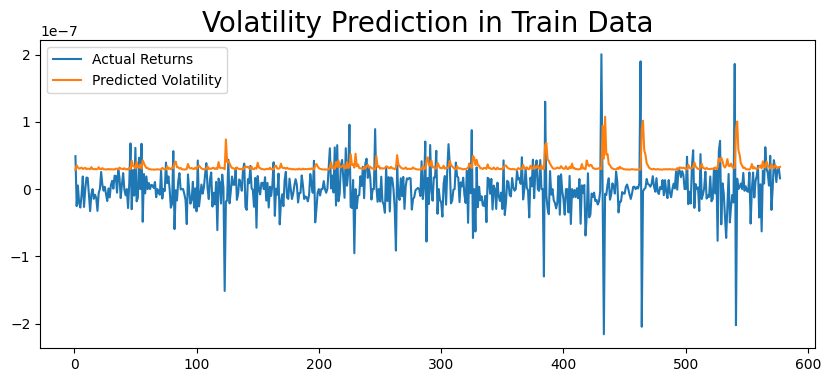

In [55]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['Diff'])
preds, = plt.plot(result_garch12_diff.conditional_volatility)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

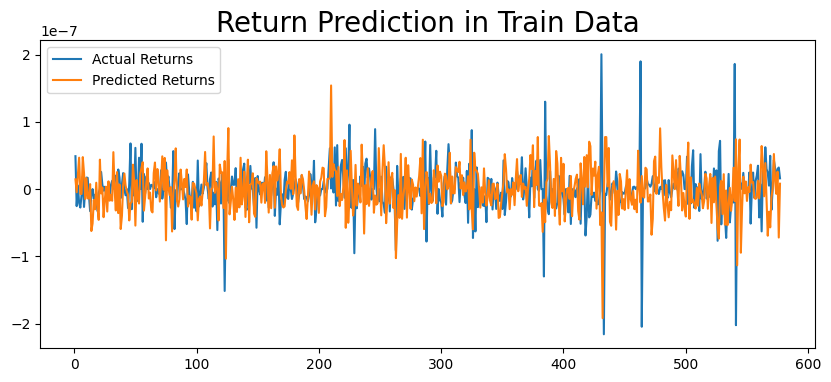

In [56]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['Diff'])
preds, = plt.plot(predicted_train)
plt.title('Return Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [57]:
from google.colab import files

predicted_train.to_excel("predicted_train.xlsx", index=False)
files.download("predicted_train.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prediksi pada Data Uji

In [58]:
condvar_test = []

for i in range(test_size):
    train = data_diff[:-(test_size-i)]
    model = arch_model(train, p=1, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.167e-15. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+07 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.166e-15. Parameter
estimation work better when this value is between 1 and 1000. The recom

In [59]:
condvar_test

[3.093536749306245e-08,
 3.144273607796253e-08,
 2.9551543435414407e-08,
 3.0588713413491304e-08,
 2.9210081225589915e-08,
 3.113931269339701e-08,
 2.956436689268993e-08,
 4.160301963413623e-08,
 3.116820150389601e-08,
 3.8621732880224285e-08,
 3.163889512186189e-08,
 3.1771988097773534e-08,
 3.068891344030621e-08,
 2.9734969940981558e-08,
 3.0228831657562915e-08,
 3.999914940164167e-08,
 3.258592115585333e-08,
 3.128144287566027e-08,
 3.483423459313086e-08,
 3.5859441690203906e-08,
 3.087599855505122e-08,
 3.0490326578577927e-08,
 3.8362805455680516e-08,
 3.25582735608026e-08,
 3.094742461524604e-08,
 3.236879484206658e-08,
 3.382428830258107e-08,
 3.588677480132817e-08,
 3.129424343788851e-08,
 3.0864639449502835e-08,
 3.0124639811455844e-08,
 2.9305672009375072e-08,
 3.055162448046754e-08,
 3.478391835426516e-08,
 4.1983259865432157e-08,
 3.806694885729175e-08,
 3.2883803449464546e-08,
 3.309411808536539e-08,
 3.238918873785391e-08,
 3.421758961068331e-08,
 3.0161706824023504e-08,
 

In [60]:
condvar_test = pd.Series(condvar_test, index=data_diff.index[-122:])
print(condvar_test)

578    3.093537e-08
579    3.144274e-08
580    2.955154e-08
581    3.058871e-08
582    2.921008e-08
           ...     
695    4.367580e-08
696    3.952407e-08
697    4.010628e-08
698    4.729102e-08
699    3.813974e-08
Length: 122, dtype: float64


In [61]:
np.random.seed(42)
epsilon_test = np.random.normal(0, 1, 122)

In [62]:
predicted_test = condvar_test * epsilon_test + 2.1621e-10
predicted_test

,0
578,1.558224e-08
579,-4.131198e-09
580,1.935641e-08
581,4.680373e-08
582,-6.623429e-09
...,...
695,-5.082674e-08
696,4.538521e-08
697,3.037345e-08
698,3.762492e-08


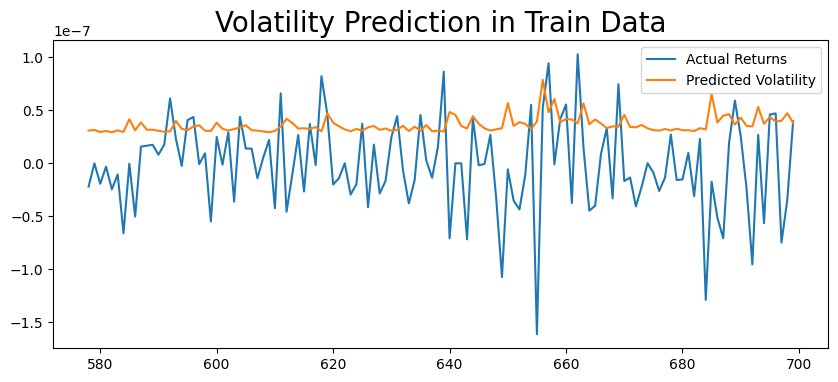

In [63]:
plt.figure(figsize=(10,4))
true, = plt.plot(test_data['Diff'])
preds, = plt.plot(condvar_test)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

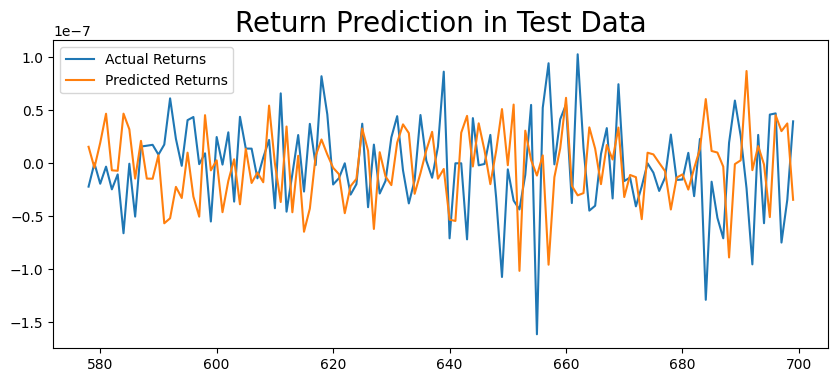

In [65]:
plt.figure(figsize=(10,4))
true, = plt.plot(data_diff[-122:])
preds, = plt.plot(predicted_test)
plt.title('Return Prediction in Test Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [66]:
from google.colab import files

predicted_test.to_excel("predicted_test.xlsx", index=False)
files.download("predicted_test.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Peramalan

Peramalan (_forecasting_) terhadap data dilakukan hingga 244 periode ke depan.

In [67]:
from datetime import datetime, timedelta

data_diff.index = pd.to_datetime(data_diff.index)

pred = result_garch12_diff.forecast(horizon=244)
future_dates = [data_diff.index[-1] + timedelta(days=i) for i in range(1,245)]
condvar_forecast = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 244 Days')

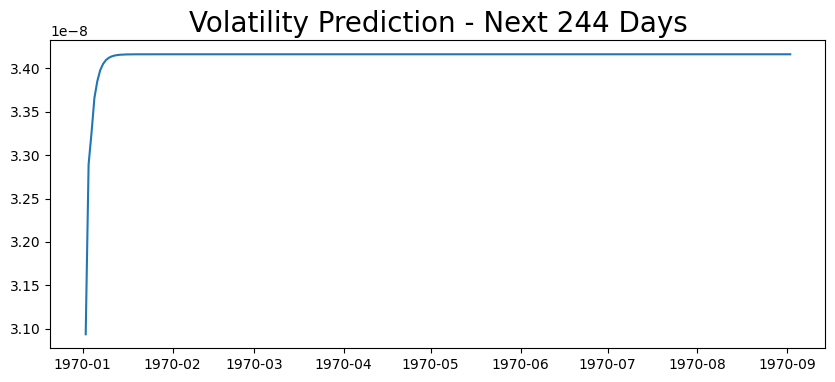

In [68]:
plt.figure(figsize=(10,4))
plt.plot(condvar_forecast)
plt.title('Volatility Prediction - Next 244 Days', fontsize=20)

In [69]:
np.random.seed(42)
epsilon_forecast = np.random.normal(0, 1, 244)

In [70]:
predicted_forecast = condvar_forecast * epsilon_forecast  + 2.1621e-10
predicted_forecast

,0
1970-01-02 00:00:00.000000699,1.558224e-08
1970-01-03 00:00:00.000000699,-4.331818e-09
1970-01-04 00:00:00.000000699,2.175387e-08
1970-01-05 00:00:00.000000699,5.147789e-08
1970-01-06 00:00:00.000000699,-7.710084e-09
...,...
1970-08-29 00:00:00.000000699,2.933705e-08
1970-08-30 00:00:00.000000699,-2.685789e-08
1970-08-31 00:00:00.000000699,-3.703417e-09
1970-09-01 00:00:00.000000699,1.746759e-08


Text(0.5, 1.0, 'Return Forecast - Next 244 Days')

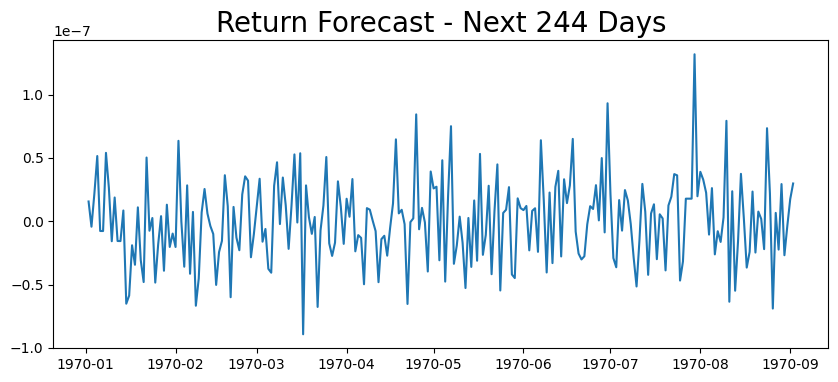

In [72]:
plt.figure(figsize=(10,4))
plt.plot(predicted_forecast)
plt.title('Return Forecast - Next 244 Days', fontsize=20)

In [73]:
from google.colab import files

predicted_forecast.to_excel("forecasted_return_120.xlsx", index=False)
files.download("forecasted_return_120.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>